In [165]:
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader 
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [166]:
data_df = pd.read_csv("riceClassification.csv")

In [167]:
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [168]:
data_df["Class"].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

In [169]:
data_df.dropna(inplace=True)

In [170]:
data_df.drop(['id'],axis=1,inplace=True)

In [171]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [172]:
print(data_df.shape)

(18185, 11)


In [173]:
original_df = data_df.copy()

In [174]:
for column in data_df.columns:
    print(max(data_df[column]))
    data_df[column]=data_df[column]/max(data_df[column])

10210
183.2114344
82.55076212
0.9667736672
11008
114.0165591
0.8865730584
508.511
0.9047483132
3.911844673
1


In [175]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [176]:
X=np.array(data_df.iloc[:,:-1])
print(X.shape)

(18185, 10)


In [177]:
Y=np.array(data_df.iloc[:,-1:])
print(Y.shape)

(18185, 1)


In [178]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42,shuffle=True)

In [179]:
print(X_train.shape,x_test.shape)
print(y_test.shape,Y_train.shape)

(12729, 10) (5456, 10)
(5456, 1) (12729, 1)


In [180]:
X_test,X_val,Y_test,Y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42,shuffle=True)

In [181]:
print(X_test.shape)
print(X_val.shape)
print(Y_test.shape)
print(Y_val.shape)

(2728, 10)
(2728, 10)
(2728, 1)
(2728, 1)


In [182]:
#pytorch data loaded function

class dataset(Dataset):
    def __init__(self,X,Y):
        self.X=torch.tensor(X,dtype=torch.float32).to(device)
        self.Y=torch.tensor(Y,dtype=torch.float32).to(device)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index],self.Y[index]
    
  

In [183]:
training_data = dataset(X_train,Y_train)
testing_data = dataset(X_test,Y_test)
validation_data = dataset(X_val,Y_val)

In [184]:
train_dataloader=DataLoader(training_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(testing_data,batch_size=32,shuffle=True)
val_dataloader=DataLoader(validation_data,batch_size=32,shuffle=True)

In [185]:
print(train_dataloader)

In [186]:
for x,y in train_dataloader:
    print(x)
    print("=====")
    print(y)
    break

tensor([[0.9321, 0.9062, 0.8986, 0.9254, 0.8929, 0.9655, 0.6726, 0.7779, 0.8448,
         0.5721],
        [0.7204, 0.8220, 0.7586, 0.9407, 0.6801, 0.8487, 0.6803, 0.6913, 0.8267,
         0.6148],
        [0.5315, 0.7223, 0.6369, 0.9492, 0.5039, 0.7291, 0.5843, 0.6062, 0.7931,
         0.6434],
        [0.4924, 0.7272, 0.5911, 0.9625, 0.4748, 0.7017, 0.5819, 0.5964, 0.7592,
         0.6980],
        [0.6699, 0.8688, 0.6736, 0.9692, 0.6367, 0.8185, 0.7542, 0.7128, 0.7231,
         0.7318],
        [0.7294, 0.9225, 0.6898, 0.9739, 0.6949, 0.8540, 0.7291, 0.7419, 0.7267,
         0.7587],
        [0.4956, 0.7920, 0.5548, 0.9815, 0.4752, 0.7040, 0.7078, 0.6388, 0.6660,
         0.8099],
        [0.5548, 0.8074, 0.6032, 0.9740, 0.5274, 0.7448, 0.6300, 0.6412, 0.7399,
         0.7594],
        [0.8267, 0.8375, 0.8659, 0.9152, 0.7852, 0.9093, 0.7277, 0.7264, 0.8593,
         0.5487],
        [0.6718, 0.8545, 0.6909, 0.9633, 0.6446, 0.8196, 0.5577, 0.7107, 0.7294,
         0.7017],
        [0

In [187]:
HIDDEN_NEURONS=10
class MyModel(nn.Module):
    #layers
    def __init__(self):
        super(MyModel,self).__init__()
        self.input_layer= nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear=nn.Linear(HIDDEN_NEURONS,1)
        self.sigmoid=nn.Sigmoid()
    #how the data goes to the model
    def forward(self,x):
        x= self.input_layer(x)
        x=self.linear(x)
        x=self.sigmoid(x)
        return x
            

In [188]:
model=MyModel().to(device)

In [189]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [190]:
criterion= nn.BCELoss()

In [191]:
optimizer=Adam(model.parameters(),lr=1e-3)

In [192]:
best_val_loss = float("inf")
patience = 30
patience_counter = 0

total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

epochs = 1000
for epoch in range(epochs):
    print(f"\n================ Epoch {epoch+1}/{epochs} ================")

    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0
    

    for inputs, labels in train_dataloader:
        prediction = model(inputs).squeeze(1)
        labels = labels.float().squeeze(1)

        batch_loss = criterion(prediction, labels)
        total_loss_train += batch_loss.item()

        acc = (prediction.round() == labels).sum().item()
        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    

    with torch.no_grad():
        for inputs, labels in val_dataloader:
            prediction = model(inputs).squeeze(1)
            labels = labels.float().squeeze(1)

            batch_loss = criterion(prediction, labels)
            total_loss_val += batch_loss.item()

            acc = (prediction.round() == labels).sum().item()
            total_acc_val += acc


    train_loss_epoch = round(total_loss_train / len(train_dataloader), 4)
    val_loss_epoch   = round(total_loss_val   / len(val_dataloader), 4)

    train_acc_epoch = round(total_acc_train / len(training_data) * 100, 4)
    val_acc_epoch   = round(total_acc_val   / len(validation_data) * 100, 4)


    total_loss_train_plot.append(train_loss_epoch)
    total_loss_val_plot.append(val_loss_epoch)
    total_acc_train_plot.append(train_acc_epoch)
    total_acc_val_plot.append(val_acc_epoch)


    print(f"Train Loss: {train_loss_epoch} | Val Loss: {val_loss_epoch}")
    print(f"Train Acc : {train_acc_epoch}% | Val Acc : {val_acc_epoch}%")

    # Uncomment if you want early stopping and best model path save

    # if val_loss_epoch < best_val_loss:
    #     best_val_loss = val_loss_epoch
    #     torch.save(model.state_dict(), "best_model.pth")
    #     print(">> Best model saved")
    #     patience_counter = 0
    # else:
    #     patience_counter += 1
    #     print(f">> No improvement. Patience: {patience_counter}/{patience}")


    # if patience_counter >= patience:
    #     print("\n### EARLY STOPPING TRIGGERED ###")
    #     break



================ Epoch 1/1000 ================
Train Loss: 0.6005 | Val Loss: 0.4501
Train Acc : 84.0836% | Val Acc : 97.8006%

================ Epoch 2/1000 ================
Train Loss: 0.3019 | Val Loss: 0.1873
Train Acc : 97.926% | Val Acc : 98.2771%

================ Epoch 3/1000 ================
Train Loss: 0.1431 | Val Loss: 0.1057
Train Acc : 98.2481% | Val Acc : 98.607%

================ Epoch 4/1000 ================
Train Loss: 0.0923 | Val Loss: 0.0757
Train Acc : 98.3974% | Val Acc : 98.6437%

================ Epoch 5/1000 ================
Train Loss: 0.0715 | Val Loss: 0.0626
Train Acc : 98.4445% | Val Acc : 98.607%

================ Epoch 6/1000 ================
Train Loss: 0.0609 | Val Loss: 0.0577
Train Acc : 98.5309% | Val Acc : 98.5704%

================ Epoch 7/1000 ================
Train Loss: 0.0547 | Val Loss: 0.0509
Train Acc : 98.5073% | Val Acc : 98.607%

================ Epoch 8/1000 ================
Train Loss: 0.0507 | Val Loss: 0.0512
Train Acc : 98.6016% |

In [193]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0

    for inputs, labels in test_dataloader:
        prediction = model(inputs).squeeze(1)
        labels = labels.float().squeeze(1)

        batch_loss = criterion(prediction, labels)
        total_loss_test += batch_loss.item()

        acc = (prediction.round() == labels).sum().item()
        total_acc_test += acc

test_loss_epoch = round(total_loss_test / len(test_dataloader), 4)
test_acc_epoch  = round(total_acc_test / len(testing_data) * 100, 4)

print("\n============ Test Results ============")
print(f"Test Loss: {test_loss_epoch}")
print(f"Test Acc : {test_acc_epoch}%")
print("======================================")



============ Test Results ============
Test Loss: 0.0257
Test Acc : 99.0836%


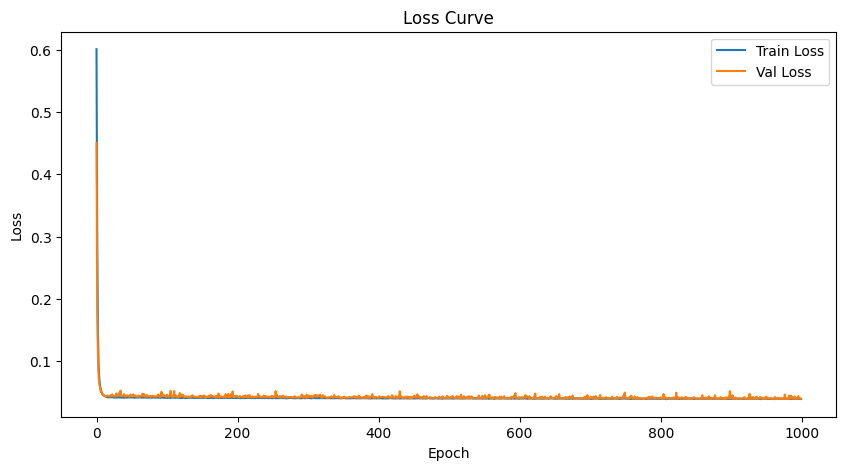

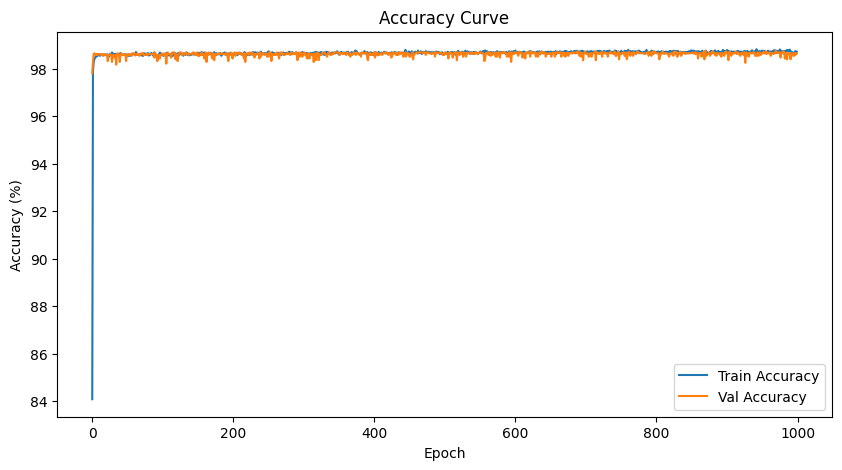

In [194]:
plt.figure(figsize=(10,5))
plt.plot(total_loss_train_plot, label='Train Loss')
plt.plot(total_loss_val_plot, label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(total_acc_train_plot, label='Train Accuracy')
plt.plot(total_acc_val_plot, label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

In [195]:
from sklearn.metrics import confusion_matrix
import torch

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        prediction = model(inputs).squeeze(1)
        labels = labels.float().squeeze(1)

        preds = prediction.round()

        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

cm = confusion_matrix(all_labels, all_preds)
print(cm)


[[1219   21]
 [   4 1484]]


In [196]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.986046511627907
Recall: 0.9973118279569892
F1 Score: 0.9916471767457401
